In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import pyreadr
import scanpy as sc

In [10]:
pseudobulks_dir = '/data1/chanj3/LUAS.multiome.results/epigenetic/TCGA_modeling/out'
pseudobulks_normed = pyreadr.read_r(f'{pseudobulks_dir}/luas_cluster_log2cpm_jointTMMwsp.rds')[None].T

In [8]:
def plot_stacked_probs(probs, class_labels=None, sample_labels=None,
                       n_rows=1, figsize=(12, 6), save_path=None, title=None,
                       xlabel='Sample_cluster', sort_by_y=None):
    """
    probs: (n_samples, n_classes) numpy array
    class_labels: list of class names (len = n_classes)
    sample_labels: list of sample names (len = n_samples)
    n_rows: number of rows in the subplot grid
    """
    n_samples, n_classes = probs.shape
    if class_labels is None:
        class_labels = [f"Class {i}" for i in range(n_classes)]
    if sample_labels is None:
        sample_labels = [f"S{i}" for i in range(n_samples)]
    if sort_by_y is not None:
        order = np.argsort(probs[:, sort_by_y])
        probs = probs[order]
        sample_labels = [sample_labels[i] for i in order]
    
    # Compute grid
    n_cols = int(np.ceil(n_samples / n_rows))
    fig, axes = plt.subplots(n_rows, 1, figsize=figsize, gridspec_kw={'hspace':0.3},
                             sharey=True)
    if n_rows == 1:
        axes = np.array([axes])
    axes = axes.ravel()

    # Colors
    cmap = plt.cm.get_cmap("tab20", n_classes)
    colors = [cmap(i) for i in range(n_classes)]

    # Split samples evenly among rows
    for i in range(n_rows):
        start = i * n_cols
        end = min((i + 1) * n_cols, n_samples)
        ax = axes[i]
        bottom = np.zeros(end - start)

        for j in range(n_classes):
            ax.bar(range(start, end), probs[start:end, j],
                   bottom=bottom, color=colors[j], label=class_labels[j])
            bottom += probs[start:end, j]

        ax.set_xticks(range(start, end))
        ax.set_xticklabels(sample_labels[start:end], rotation=90, fontsize=8)
        if i == 0:  # only put legend once
            ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

        ax.set_ylim(0, 1.0)
        ax.tick_params(axis='both', labelsize=12)
        ax.set_ylabel('Predicted probability', fontsize=14)
    axes[-1].set_xlabel(xlabel, fontsize=14)
    if save_path is not None:
        fig.savefig(save_path, dpi=200, bbox_inches='tight')
    if title is not None:
        axes[0].set_title(title, fontsize=14)
    return fig, axes

In [11]:
def subset_peaks(exp_df, peaks):
    return exp_df.reindex(columns=peaks, fill_value=0)

/tmp/ipykernel_384006/2214401450.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", n_classes)
/tmp/ipykernel_384006/2214401450.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", n_classes)
/tmp/ipykernel_384006/2214401450.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", n_classes)
/tmp/ipykernel_384006/2214401450.py:29: MatplotlibDeprecationWarning: The get_c

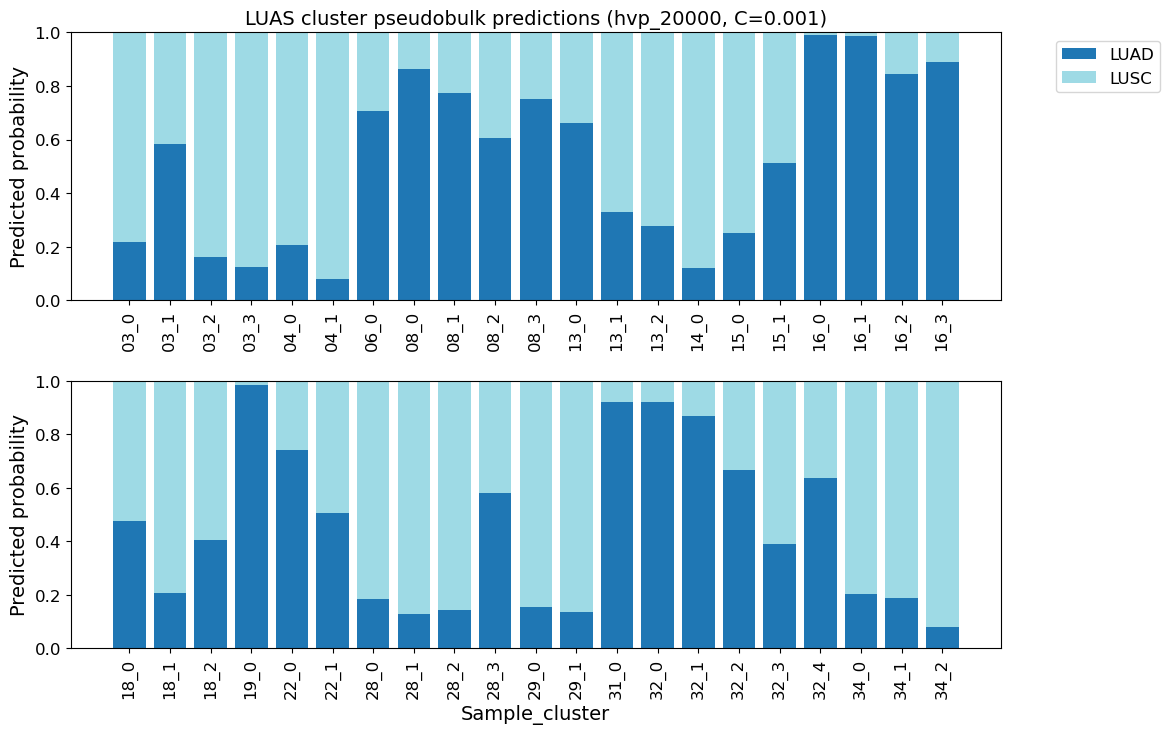

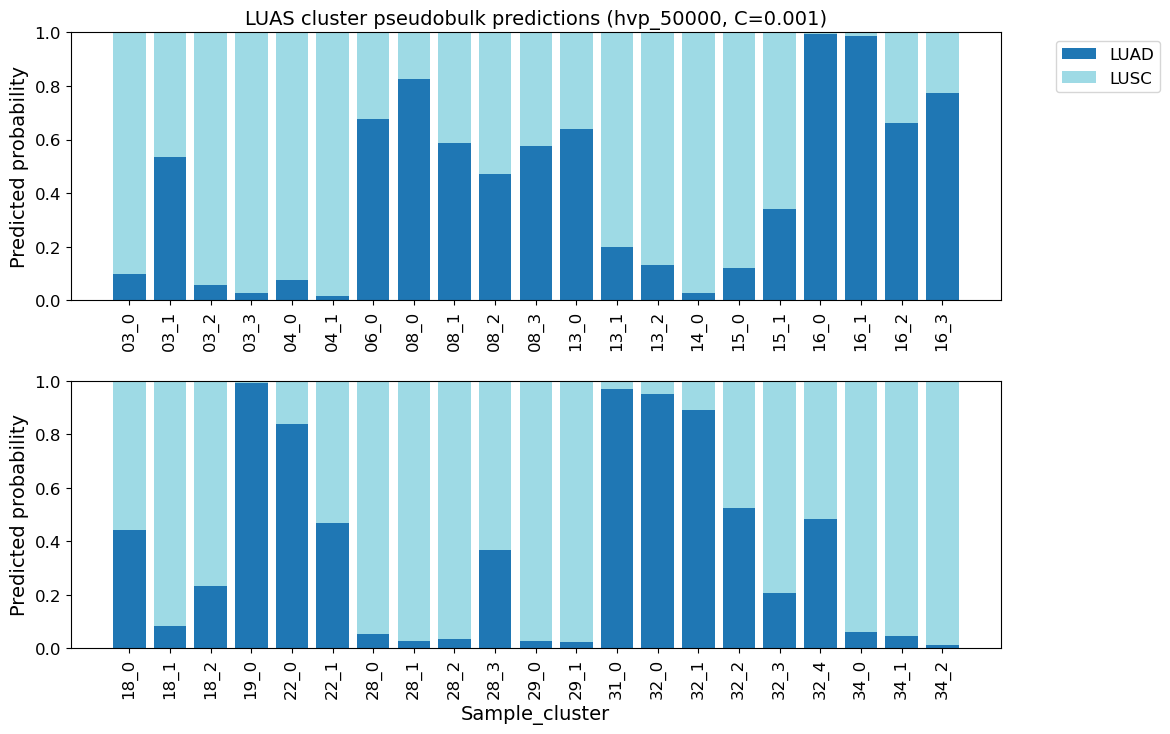

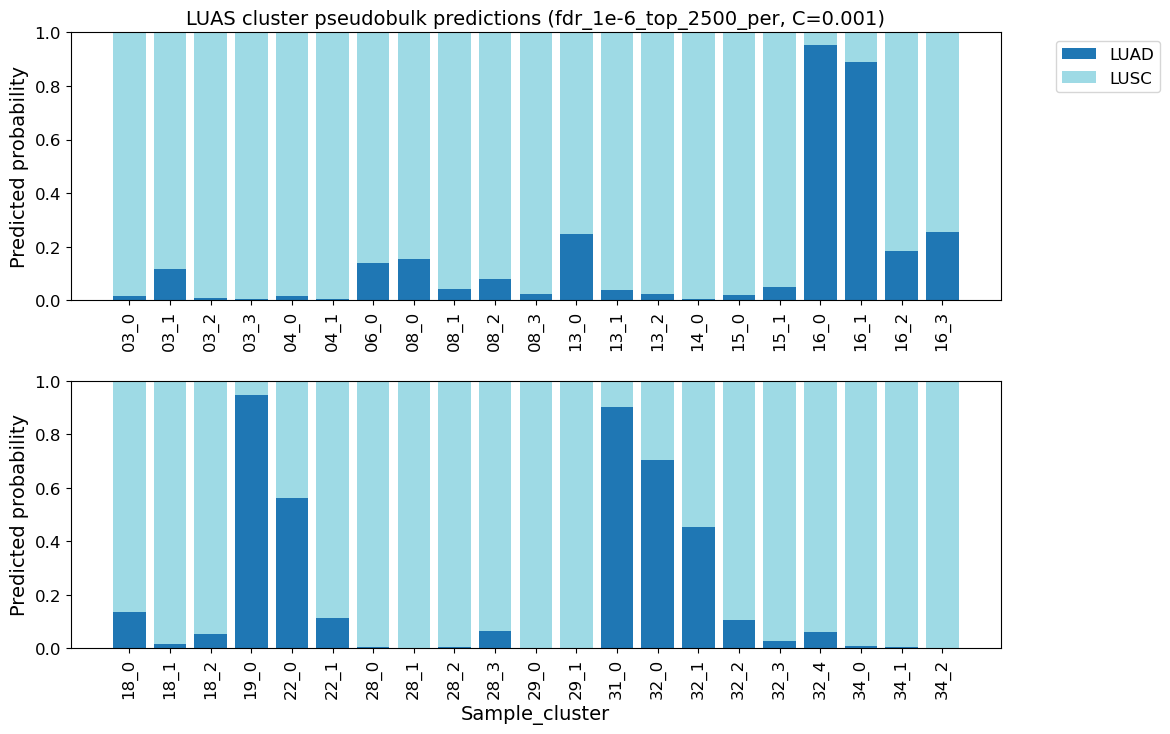

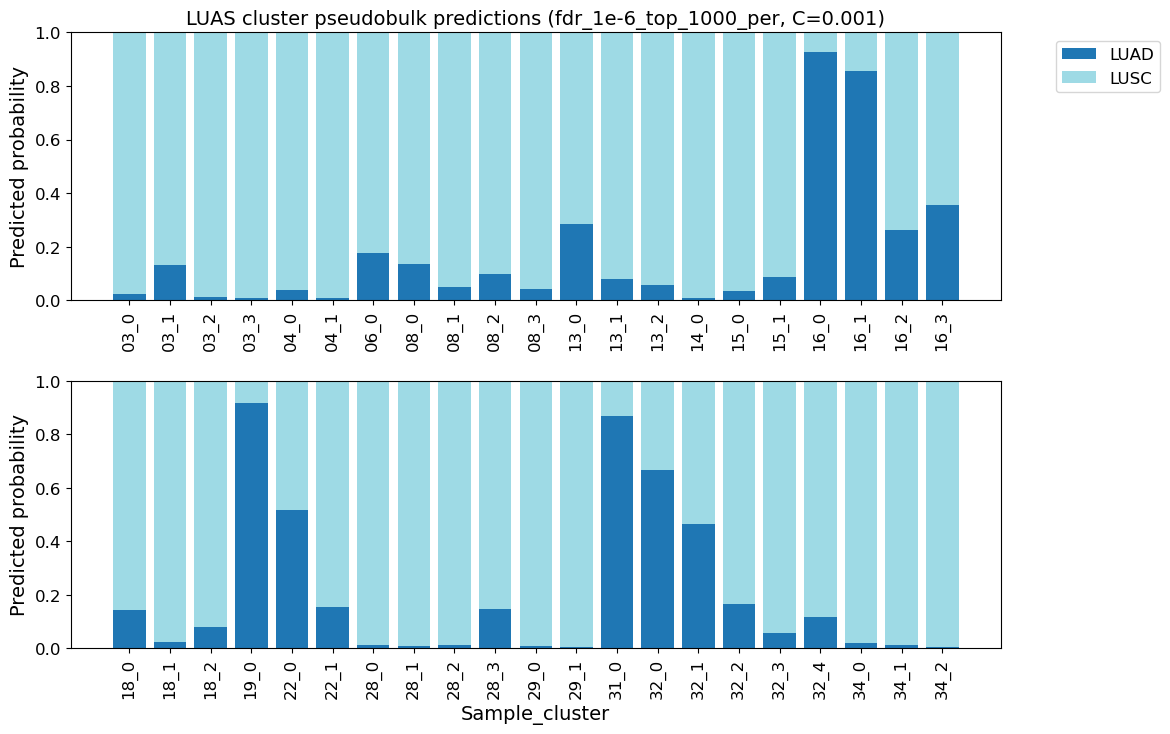

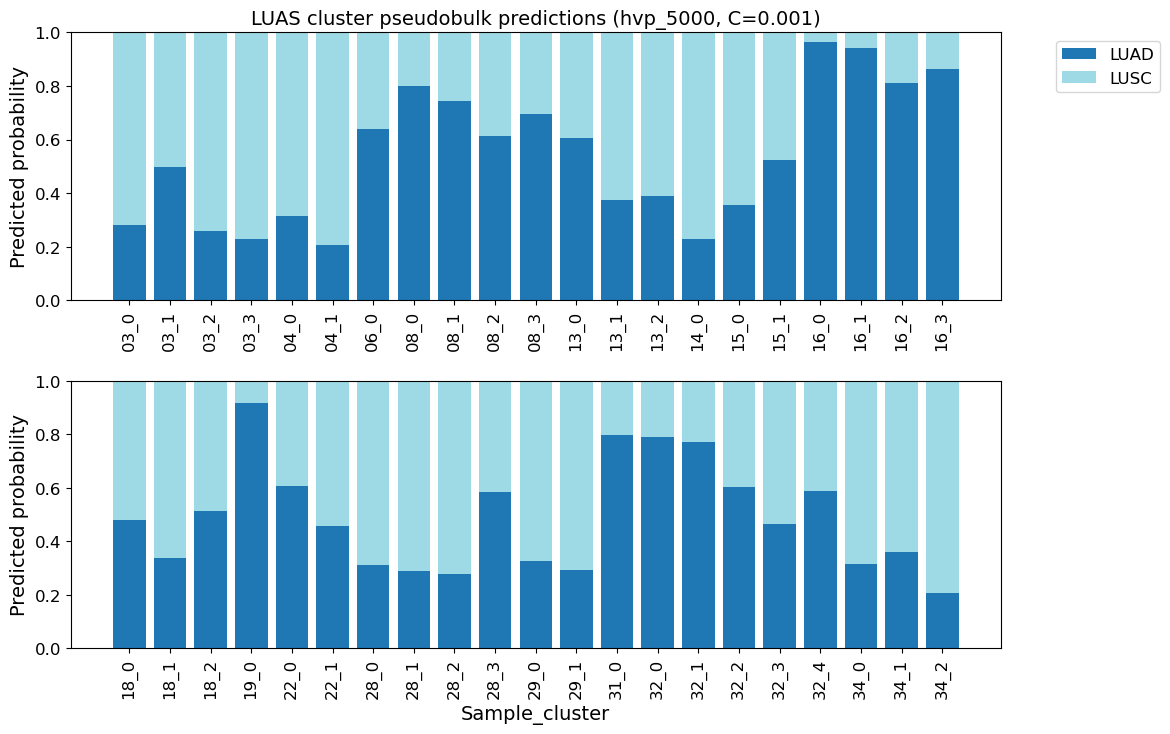

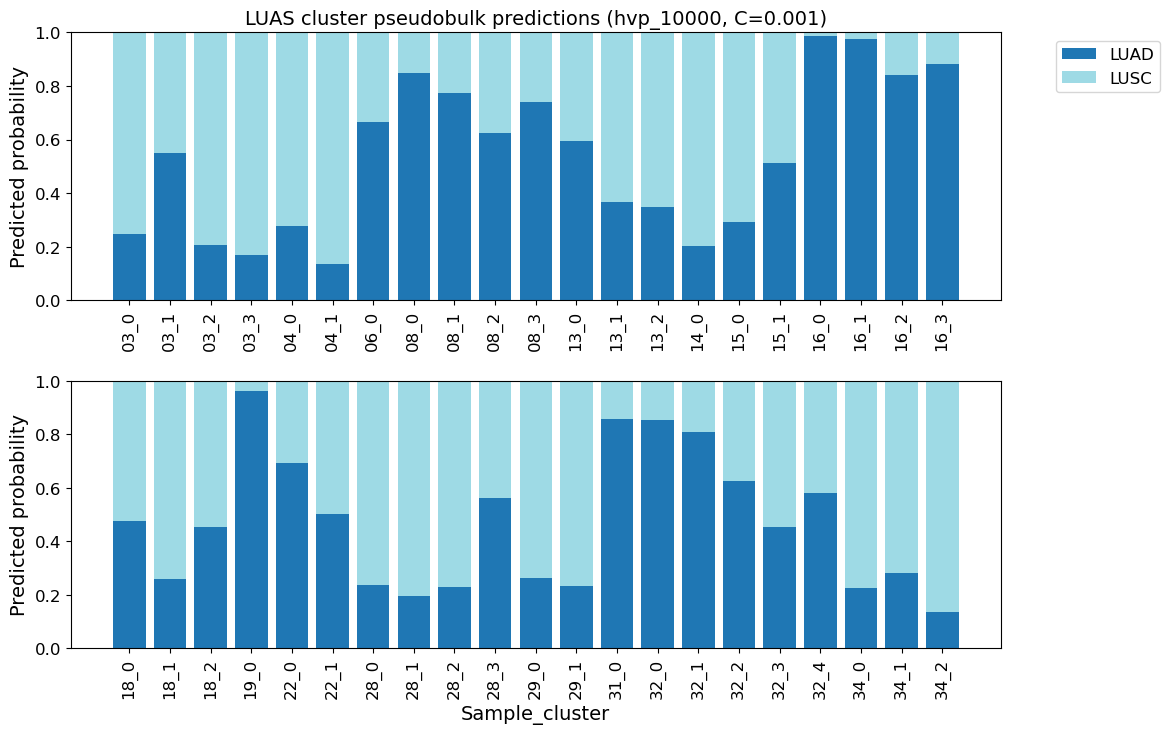

In [12]:
import os
peak_sets = [x.split('.txt')[0] for x in os.listdir('luad_vs_lusc_input_peaks')]
for peak_set in peak_sets:
    model_dir = f'/data1/chanj3/LUAS.multiome.results/epigenetic/TCGA_modeling/out/log_reg/luad_vs_lusc_{peak_set}'
    with open(f'{model_dir}/cv_metrics.pkl', 'rb') as f:
        metrics = pickle.load(f)
    C_scores = {C: np.median(Cm['test_f1_macro']) for C, Cm in metrics.items()}
    C = pd.Series(C_scores).idxmax()
    with open(f'{model_dir}/models.pkl', 'rb') as f:
        models = pickle.load(f)
    model = models[C]
    peaks = model.feature_names_in_
    X = subset_peaks(pseudobulks_normed, peaks)
    pseudobulk_probs = model.predict_proba(X)
    plot_stacked_probs(pseudobulk_probs, class_labels=model.classes_, sample_labels=pseudobulks_normed.index,
                       n_rows=2, figsize=(12, 8), save_path=f'{model_dir}/LUAS_cluster_pseudobulk_preds_C={C}.png',
                       title=f'LUAS cluster pseudobulk predictions ({peak_set}, C={C})')

In [13]:
pseudobulks_dir = '/data1/chanj3/LUAS.multiome.results/epigenetic/TCGA_modeling/out'
pseudobulks_normed = pyreadr.read_r(f'{pseudobulks_dir}/luas_sample_log2cpm_jointTMMwsp.rds')[None].T

/tmp/ipykernel_384006/2214401450.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", n_classes)
/tmp/ipykernel_384006/2214401450.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", n_classes)
/tmp/ipykernel_384006/2214401450.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", n_classes)
/tmp/ipykernel_384006/2214401450.py:29: MatplotlibDeprecationWarning: The get_c

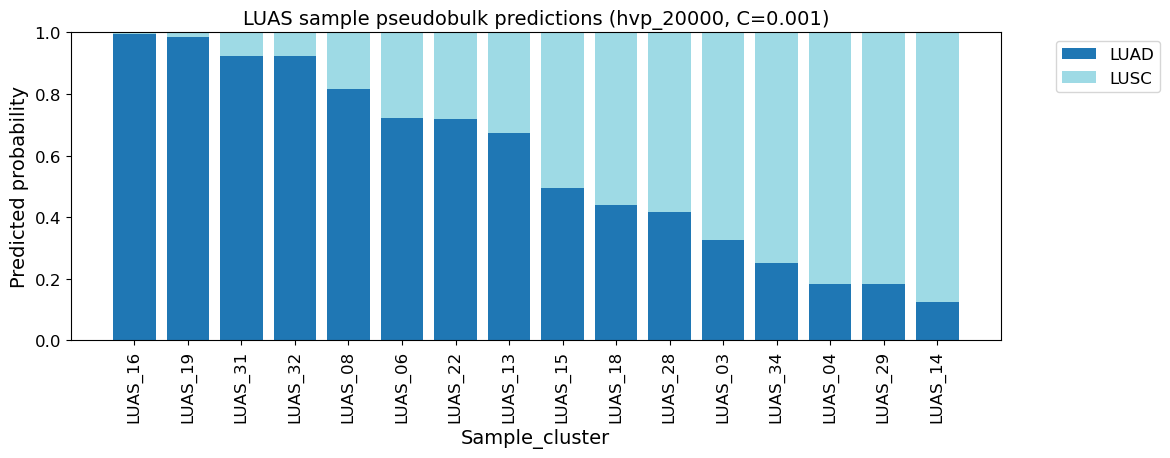

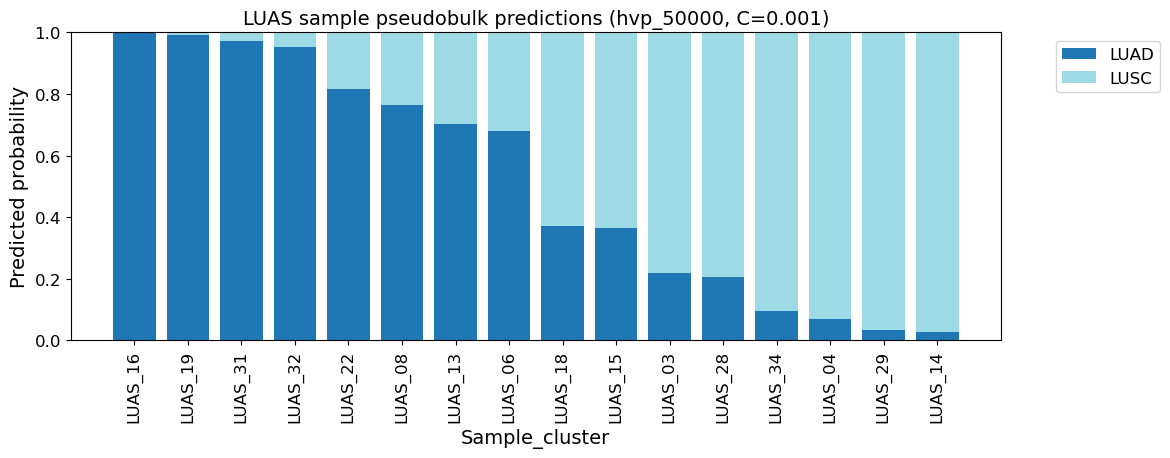

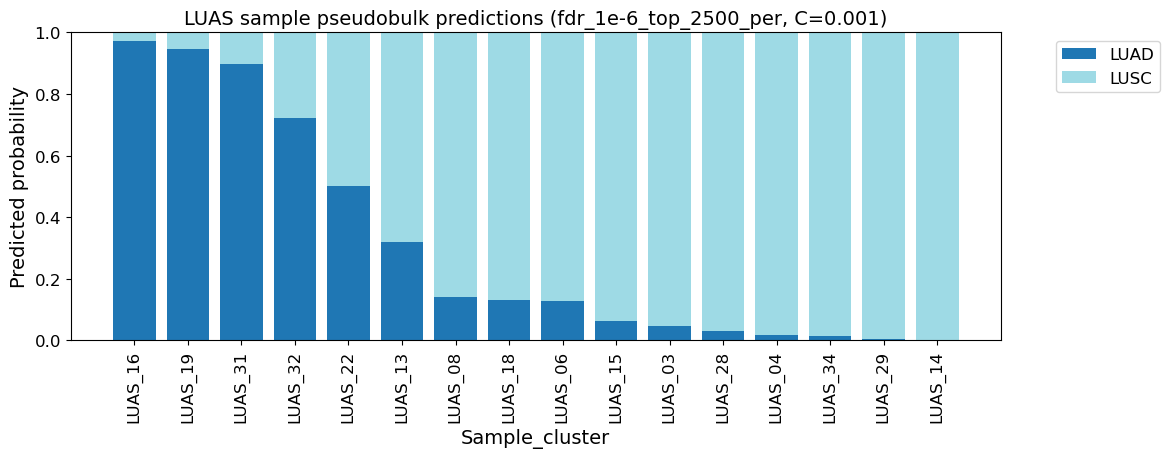

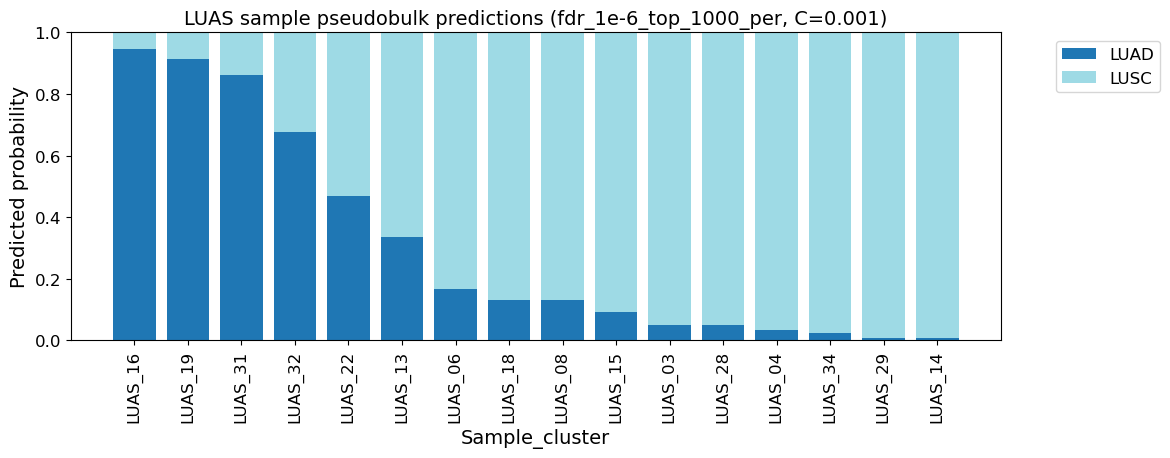

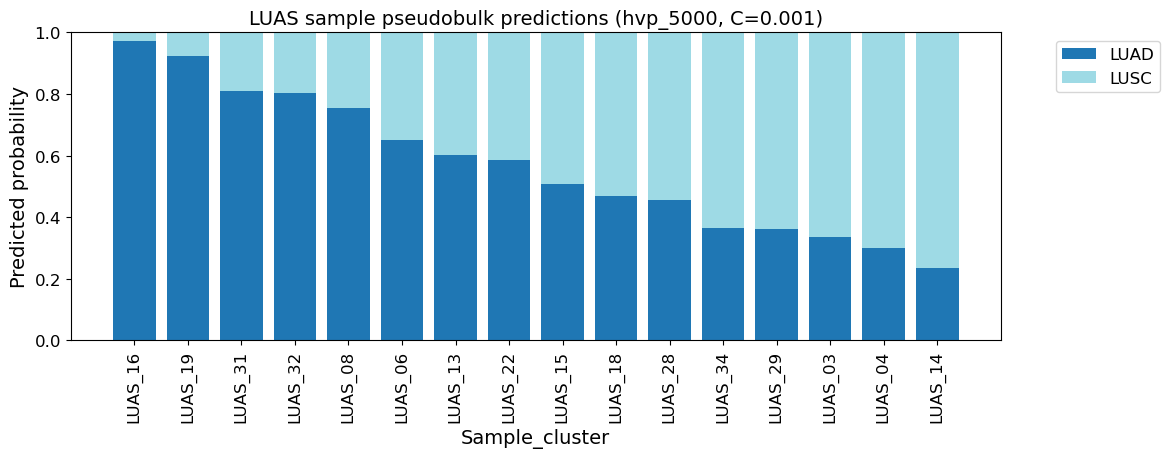

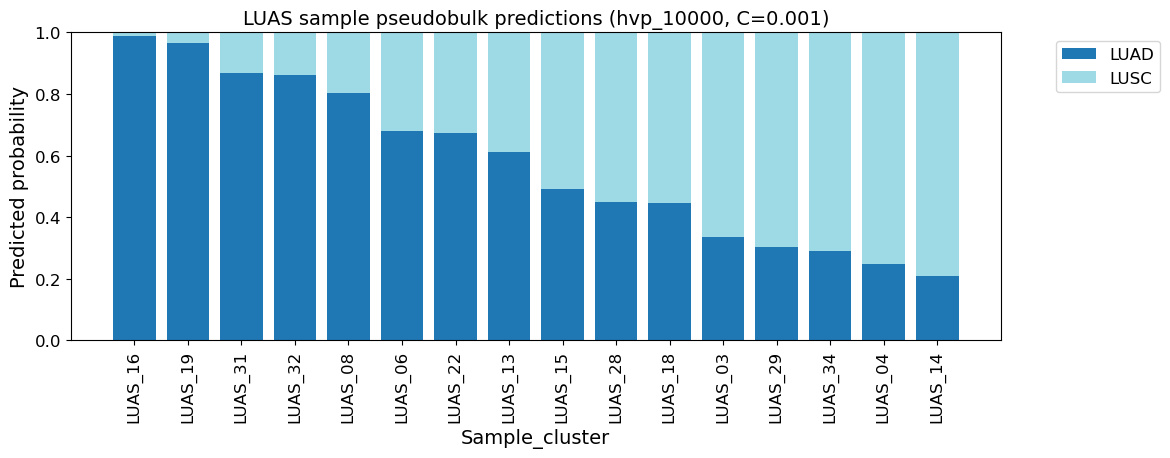

In [16]:
import os
peak_sets = [x.split('.txt')[0] for x in os.listdir('luad_vs_lusc_input_peaks')]
for peak_set in peak_sets:
    model_dir = f'/data1/chanj3/LUAS.multiome.results/epigenetic/TCGA_modeling/out/log_reg/luad_vs_lusc_{peak_set}'
    with open(f'{model_dir}/cv_metrics.pkl', 'rb') as f:
        metrics = pickle.load(f)
    C_scores = {C: np.median(Cm['test_f1_macro']) for C, Cm in metrics.items()}
    C = pd.Series(C_scores).idxmax()
    with open(f'{model_dir}/models.pkl', 'rb') as f:
        models = pickle.load(f)
    model = models[C]
    peaks = model.feature_names_in_
    X = subset_peaks(pseudobulks_normed, peaks)
    pseudobulk_probs = model.predict_proba(X)
    plot_stacked_probs(pseudobulk_probs, class_labels=model.classes_, sample_labels=pseudobulks_normed.index,
                       n_rows=1, figsize=(12, 4), save_path=f'{model_dir}/LUAS_sample_pseudobulk_preds_C={C}.png',
                       title=f'LUAS sample pseudobulk predictions ({peak_set}, C={C})', sort_by_y=1)